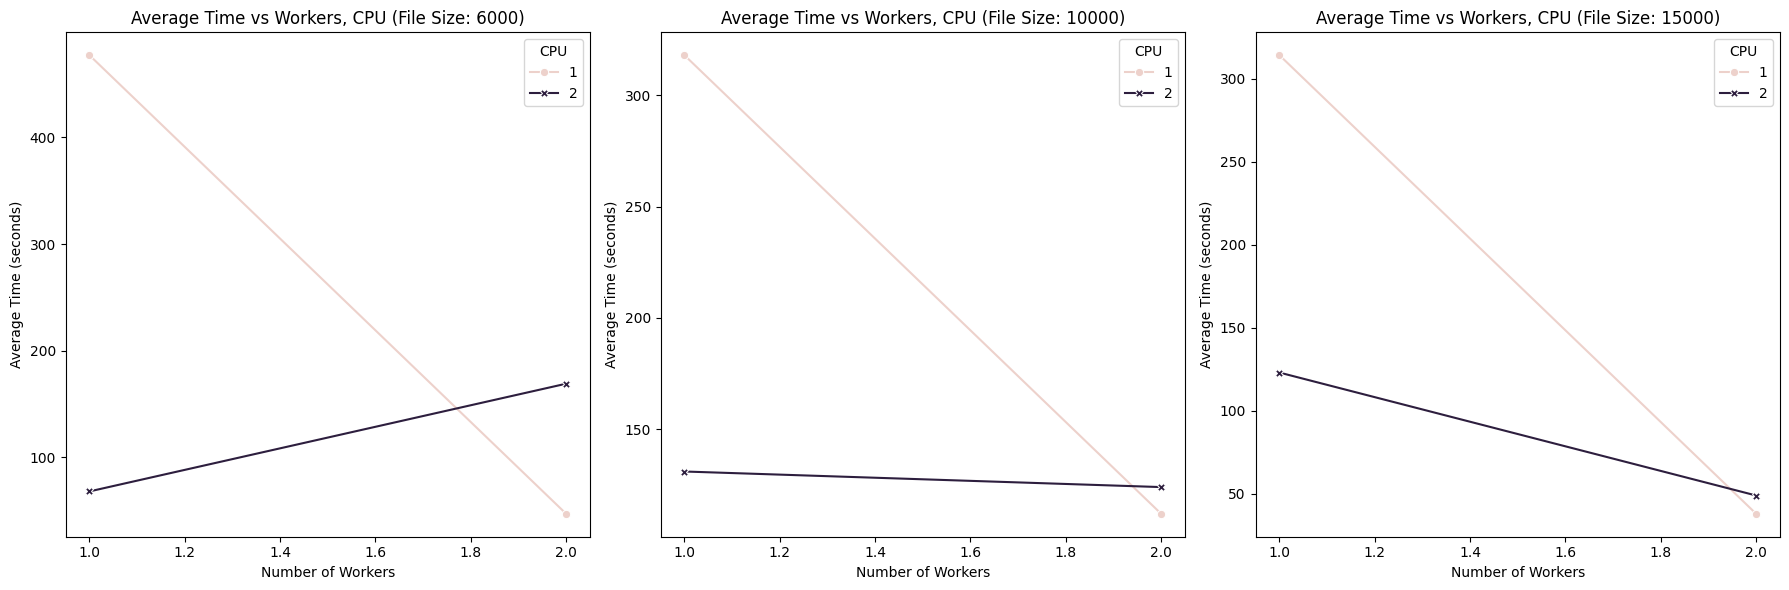

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data from the provided table
data = {
    "Workers": [1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2],
    "CPU": [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
    "FileSize": [6000, 6000, 6000, 6000, 10000, 10000, 10000, 10000, 15000, 15000, 15000, 15000],
    "Average Time": ["00:07:57", "00:01:08", "00:00:47", "00:02:49",
                     "00:05:18", "00:02:11", "00:01:52", "00:02:04",
                     "00:05:14", "00:02:03", "00:00:38", "00:00:49"],
    "SpeedUp": ["", "698.54%", "145.39%", "27.87%",
                "", "242.49%", "116.96%", "90.57%",
                "", "254.59%", "39.28%", "77.03%"]
}

# Converting to DataFrame
df = pd.DataFrame(data)

# Function to convert time strings to seconds
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

# Convert Average Time to seconds
df['Average Time'] = df['Average Time'].apply(time_to_seconds)

# Creating subplots for the three different file sizes
file_sizes = df['FileSize'].unique()
fig, axes = plt.subplots(nrows=1, ncols=len(file_sizes), figsize=(18, 6))

for i, size in enumerate(file_sizes):
    df_subset = df[df['FileSize'] == size]
    sns.lineplot(ax=axes[i], data=df_subset, x="Workers", y="Average Time", hue="CPU", style="CPU", markers=True, dashes=False)
    axes[i].set_title(f'Average Time vs Workers, CPU (File Size: {size})')
    axes[i].set_xlabel('Number of Workers')
    axes[i].set_ylabel('Average Time (seconds)')
    axes[i].legend(title='CPU')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
